<a href="https://colab.research.google.com/github/jaaaamj0711/kaggle_study/blob/master/Clubhouse/clubhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
plt.style.use(['Solarize_Light2'])
import seaborn as sns
import plotly.figure_factory as ff 

In [ ]:
# 한글 폰트 사용을 위한 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [ ]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

In [ ]:
# 데이터 형식기 db인 관계로 sqlie3 패키지를 사용하여 데이터를 불러준다.
connection = sqlite3.connect("/content/drive/MyDrive/Clubhouse_Dataset_v1.db")

data = pd.read_sql("select * from user", con=connection)
data  = data.replace(to_replace ='null',value =np.nan)
data.head(5)

In [ ]:
data.to_csv("/content/drive/MyDrive/data.csv")

In [ ]:
data['time_created'] = pd.to_datetime(data["time_created"]).apply(lambda x: x.date())

In [ ]:
time_group = data.groupby('time_created', as_index=False)
time_group = time_group.agg(user_count = ('time_created', 'count'))

In [ ]:
plt.style.use(['bmh'])

## 새로운 고객 가입 추이

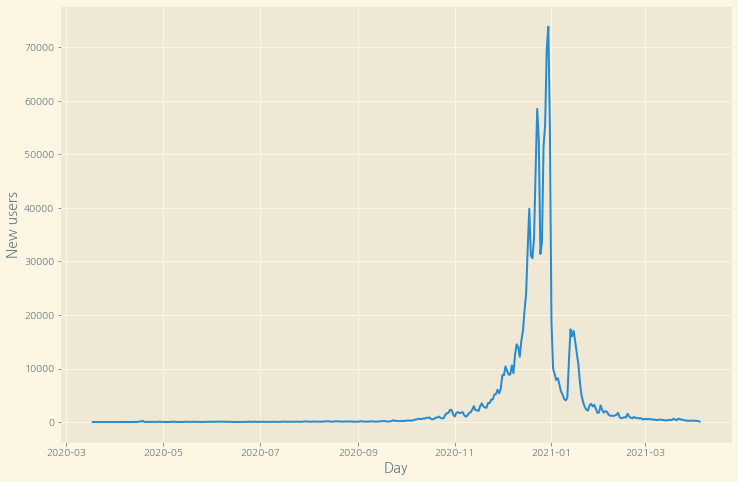

In [40]:
plt.figure(figsize=(12,8))
sns.lineplot(x=time_group['time_created'], y=time_group['user_count'])
plt.xlabel('Day', fontsize=14)
plt.ylabel('New users', fontsize=14)
plt.show()

- 2020년 11월부터 신규 가입자들이 증가하고 2021년 1월쯤 가장 많은 사람들이 가입을 했습니다.


In [ ]:
top = data.nlargest(20,['num_followers'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 클럽 하우스안에서 영향력이 있는 사람을 누굴까?

영향력이 있는 사람을 분석하기 위해 팔로워수를 기준으로 상위 20명의 사용자들을 보도록 하겠습니다.

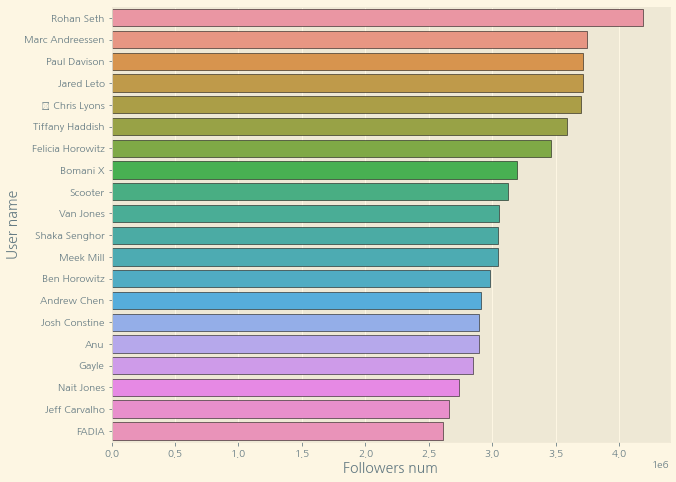

In [75]:
plt.figure(figsize=(10,8))
fol_plot = sns.barplot(x=top['num_followers'], y = top['name'], edgecolor=(0,0,0))
plt.xlabel('Followers num', fontsize=14)
plt.ylabel('User name', fontsize=14)

plt.title('', fontsize=16)
plt.show()

- 상위권에 있는 로한 세스와 폴 데이비슨은 클럽 하우스의 창시자입니다. 
- 두번째 순위에 있는 마크 앤드리슨은 실리콘밸리의 스타 벤처투자사입니다. 마크 앤드리슨은 클럽하우스의 초창기 부터 투자를 진행했다고 합니다.
- 그 외에는 배우, 가수 등이 있었습니다.

In [42]:
data.head()

,user_id,name,photo_url,username,twitter,instagram,num_followers,num_following,time_created,invited_by_user_profile
0,4,Rohan Seth,https://clubhouseprod.s3.amazonaws.com:443/4_b...,rohan,rohanseth,NaN,4187268,599,2020-03-17,NaN
1,5,Paul Davison,https://clubhouseprod.s3.amazonaws.com:443/5_e...,paul,pdavison,NaN,3718334,1861,2020-03-17,NaN
2,8,Johnny Appleseed,None,apple1,NaN,srt_tester_9,20,81,2020-03-19,NaN
3,10,DK 🖍,https://clubhouseprod.s3.amazonaws.com:443/10_...,dk,dksf,NaN,49538,173,2020-03-19,NaN
4,12,Jonathan Gheller,https://clubhouseprod.s3.amazonaws.com:443/12_...,jonathan,jgheller,NaN,21250,81,2020-03-20,NaN


## 클럽 하우스 사용자들은 어떠한 SNS를 많이 할까?

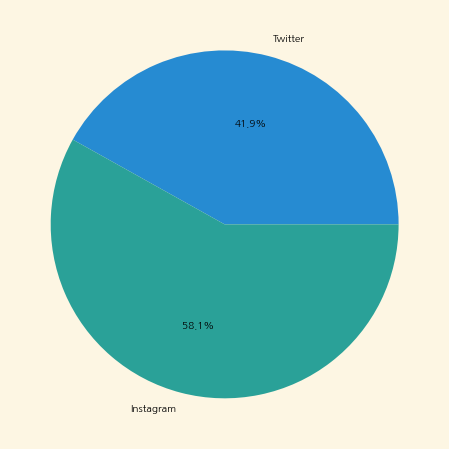

In [76]:
plt.figure(figsize=(10,8))
ti = [['Twitter', len(data[data['twitter'].notnull()==True])], ['Instagram', len(data[data['instagram'].notnull()==True])]]
ti =pd.DataFrame(ti,columns=['Name','count'])
plt.pie(ti['count'], labels=ti['Name'], autopct='%.1f%%')
plt.show()

- 인스타를 하는 사람들이 더 많았습니다.